In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def mape(actual, pred): 
    '''
    Mean Absolute Percentage Error (MAPE) Function
    
    input: list/series for actual values and predicted values
    output: mape value 
    '''
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

## Prophet Only
(artinya prophet yang  menangani sendiri data yang non stasioner )

In [3]:
stasiun_4_intrp = pd.read_csv('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Dataset\\Processed\\time series\\stasiun_4_intrp.csv')
stasiun_4_intrp.head()

,Unnamed: 0,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0


In [4]:
df_train = stasiun_4_intrp[['Unnamed: 0','Tavg']].rename(columns={'Unnamed: 0' : 'ds',
                                                               'Tavg': 'y'})

In [5]:
df_train['ds'] = pd.to_datetime(df_train['ds'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1827 non-null   datetime64[ns]
 1   y       1827 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.7 KB


In [6]:
min(df_train['ds']), max(df_train['ds'])

(Timestamp('2016-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))

## Validasi dengan tahun 2020

In [26]:
#default parameters for prophet models
#prophet default is additive
from prophet import Prophet
model = Prophet()



In [27]:
train_data = df_train[df_train['ds'].dt.year < 2020]

In [28]:
model.fit(train_data)
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)

00:29:25 - cmdstanpy - INFO - Chain [1] start processing
00:29:25 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds       yhat  yhat_lower  yhat_upper
1821 2020-12-26  28.639821   27.432179   29.814646
1822 2020-12-27  28.596598   27.418430   29.728523
1823 2020-12-28  28.525225   27.293689   29.710632
1824 2020-12-29  28.509066   27.296412   29.732806
1825 2020-12-30  28.535688   27.316431   29.726665


In [30]:
test_data = df_train[df_train['ds'].dt.year == 2020]

In [32]:
predicted_df = forecast.merge(test_data.rename(columns={'y': 'ytrue'}), on='ds')
predicted_df


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,ytrue
0,2020-01-01,28.372737,27.242061,29.379762,28.372737,28.372737,-0.111931,-0.111931,-0.111931,-0.042908,-0.042908,-0.042908,-0.069022,-0.069022,-0.069022,0.0,0.0,0.0,28.260806,24.6
1,2020-01-02,28.373448,27.237216,29.371049,28.373448,28.373448,-0.080345,-0.080345,-0.080345,0.009694,0.009694,0.009694,-0.090039,-0.090039,-0.090039,0.0,0.0,0.0,28.293103,26.6
2,2020-01-03,28.374159,27.187909,29.343826,28.374159,28.374159,-0.063353,-0.063353,-0.063353,0.055140,0.055140,0.055140,-0.118493,-0.118493,-0.118493,0.0,0.0,0.0,28.310806,27.7
3,2020-01-04,28.374871,27.310202,29.371009,28.374871,28.374871,-0.072387,-0.072387,-0.072387,0.081932,0.081932,0.081932,-0.154319,-0.154319,-0.154319,0.0,0.0,0.0,28.302484,27.4
4,2020-01-05,28.375582,27.147877,29.278541,28.375582,28.375582,-0.172452,-0.172452,-0.172452,0.024842,0.024842,0.024842,-0.197293,-0.197293,-0.197293,0.0,0.0,0.0,28.203130,27.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2020-12-26,28.628810,27.432179,29.814646,28.257317,29.034435,0.011011,0.011011,0.011011,0.081932,0.081932,0.081932,-0.070921,-0.070921,-0.070921,0.0,0.0,0.0,28.639821,28.2
361,2020-12-27,28.629521,27.418430,29.728523,28.257536,29.036699,-0.032923,-0.032923,-0.032923,0.024842,0.024842,0.024842,-0.057765,-0.057765,-0.057765,0.0,0.0,0.0,28.596598,29.0
362,2020-12-28,28.630233,27.293689,29.710632,28.257215,29.038962,-0.105008,-0.105008,-0.105008,-0.055037,-0.055037,-0.055037,-0.049970,-0.049970,-0.049970,0.0,0.0,0.0,28.525225,28.1
363,2020-12-29,28.630944,27.296412,29.732806,28.255794,29.041226,-0.121878,-0.121878,-0.121878,-0.073662,-0.073662,-0.073662,-0.048216,-0.048216,-0.048216,0.0,0.0,0.0,28.509066,27.1


In [33]:
mape_value = mape(predicted_df['ytrue'], predicted_df['yhat'])
print("MAPE untuk tahun 2020:", mape_value)

MAPE untuk tahun 2020: 3.116411545701941


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


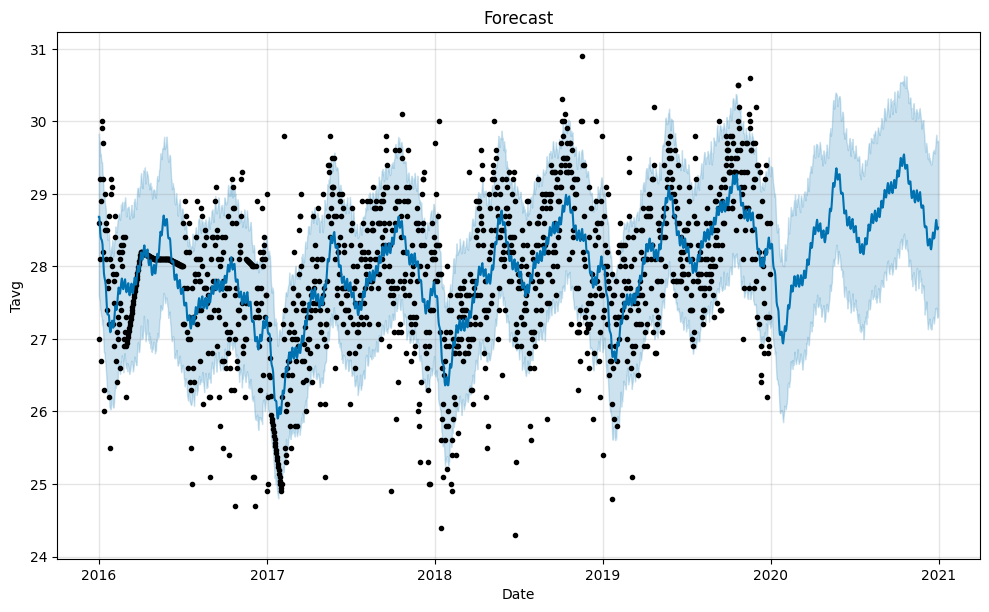

In [34]:
fig = model.plot(forecast)
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Tavg')
plt.grid(True)
plt.show()

## Validasi dengan keseluruhan tahun ???

In [16]:
X_train = df_train[(df_train['ds'].dt.year >= 2016) & (df_train['ds'].dt.year < 2020)]

In [17]:
from prophet import Prophet
model = Prophet()
model.fit(X_train)

00:27:00 - cmdstanpy - INFO - Chain [1] start processing
00:27:00 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)


In [19]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds       yhat  yhat_lower  yhat_upper
1821 2020-12-26  28.639821   27.361639   29.736955
1822 2020-12-27  28.596598   27.375784   29.766409
1823 2020-12-28  28.525225   27.440784   29.651979
1824 2020-12-29  28.509066   27.356219   29.651517
1825 2020-12-30  28.535688   27.398976   29.712599


In [20]:
df_copy = df_train.copy()
df_copy.columns = ['ds', 'ytrue']
predicted_df = forecast.merge(df_copy)

In [21]:
predicted_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,ytrue
0,2016-01-01,28.696614,27.640806,29.743397,28.696614,28.696614,-0.013882,-0.013882,-0.013882,0.055140,0.055140,0.055140,-0.069022,-0.069022,-0.069022,0.0,0.0,0.0,28.682732,28.6
1,2016-01-02,28.690620,27.543057,29.783093,28.690620,28.690620,-0.008108,-0.008108,-0.008108,0.081932,0.081932,0.081932,-0.090039,-0.090039,-0.090039,0.0,0.0,0.0,28.682513,27.0
2,2016-01-03,28.684627,27.540224,29.605050,28.684627,28.684627,-0.093652,-0.093652,-0.093652,0.024842,0.024842,0.024842,-0.118493,-0.118493,-0.118493,0.0,0.0,0.0,28.590975,28.1
3,2016-01-04,28.678634,27.309740,29.476737,28.678634,28.678634,-0.209356,-0.209356,-0.209356,-0.055037,-0.055037,-0.055037,-0.154319,-0.154319,-0.154319,0.0,0.0,0.0,28.469278,29.2
4,2016-01-05,28.672640,27.317235,29.444836,28.672640,28.672640,-0.270955,-0.270955,-0.270955,-0.073662,-0.073662,-0.073662,-0.197293,-0.197293,-0.197293,0.0,0.0,0.0,28.401685,26.7


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


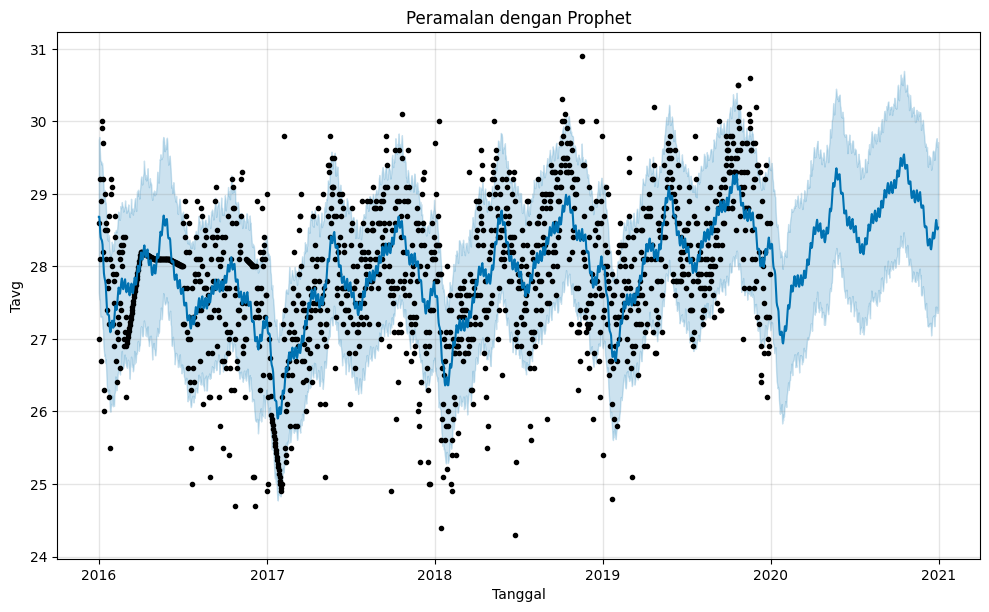

In [22]:
model.plot(forecast)
plt.xlabel('Tanggal')
plt.ylabel('Tavg')
plt.title('Peramalan dengan Prophet')
plt.show()

## MAPE 

In [23]:
mape(predicted_df['ytrue'], predicted_df['yhat'])

2.4945731627334893

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

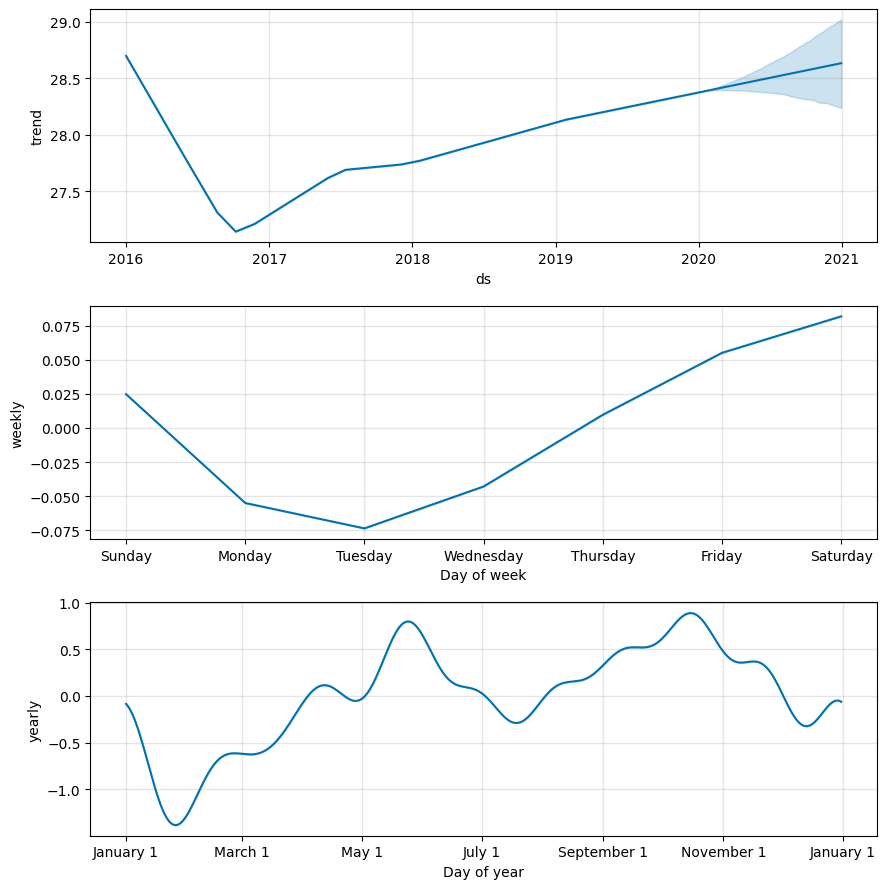

In [24]:
fig = model.plot_components(forecast)

## Manually Differencing